In [4]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from stable_baselines3 import PPO

In [6]:
BASE_PATH = '../../output_models_initial'
BASE_PATH2 = '../../initial_model'

# PPO CNN

In [25]:
# model = PPO.load(f'{BASE_PATH}/ppo/CnnPolicy/best_model.zip')
model_policy = '/ppo/CnnPolicy/best_model_'
models = [
    PPO.load(f'{BASE_PATH}{model_policy}0_1.zip'),
    PPO.load(f'{BASE_PATH}{model_policy}1_125000.zip'),
    PPO.load(f'{BASE_PATH}{model_policy}2_250000.zip'),
    PPO.load(f'{BASE_PATH}{model_policy}3_375000.zip'),
    PPO.load(f'{BASE_PATH}{model_policy}4_500000.zip'),
]

X = np.load(f'{BASE_PATH2}/observations/observations_ppo_CnnPolicy_15.npy')
# X = np.load(f'{BASE_PATH2}/ppo/CnnPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([4827, 1, 1, 15, 7])

In [26]:
predictions = []
for model in models:
    predictions_model = []
    for _ in X:
        predictions_model.append(model.predict(X[0])[0][0])
    predictions_model = np.array(predictions_model)
    predictions.append(predictions_model)

In [27]:
from ppo_policy import PPOPolicy
ppo_nets = [PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model) for model in models]


In [28]:
# Random samples
N = 300
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]

ig_attributors = []
for i, ppo_net in enumerate(ppo_nets):
    predictions_sample = predictions[i][idxs]

# Sequential samples
# i_start = 0
# i_stop = 500
# X_sample = X[i_start:i_stop]
# predictions_sample = predictions[i_start:i_stop]

    ig_attributor = IGAttributor(net=ppo_net,
                                policy='cnn',
                                agent='ppo',
                                data=X_sample,
                                predictions=predictions_sample)

    ig_attributors.append(ig_attributor)
                            

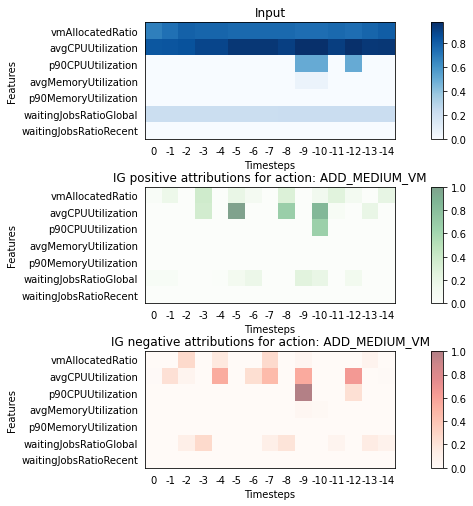

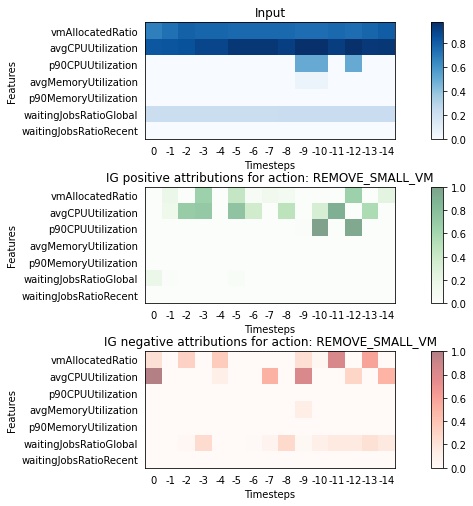

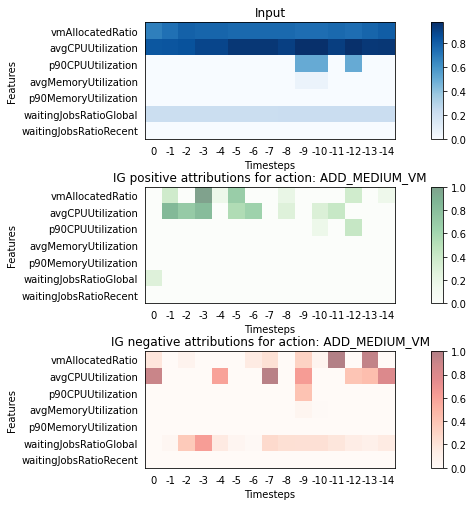

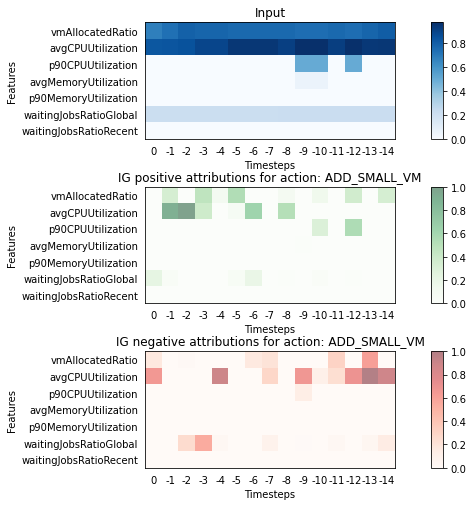

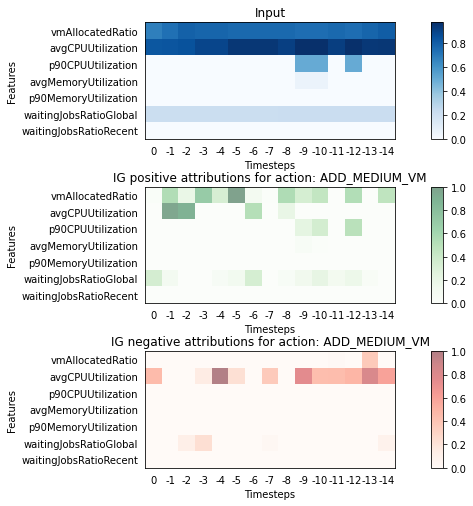

In [33]:
for ig_attributor in ig_attributors:
    ig_attributor.explain_example(150)

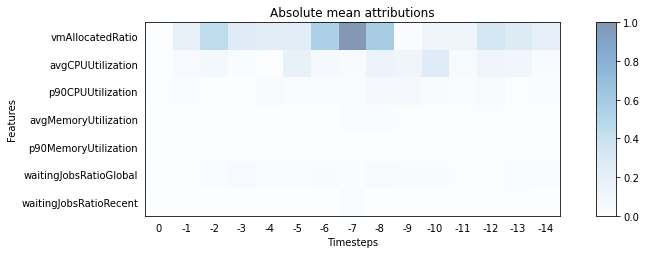

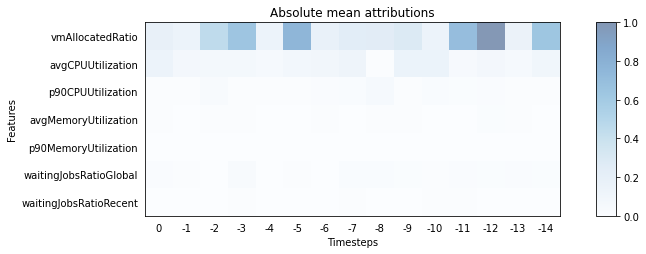

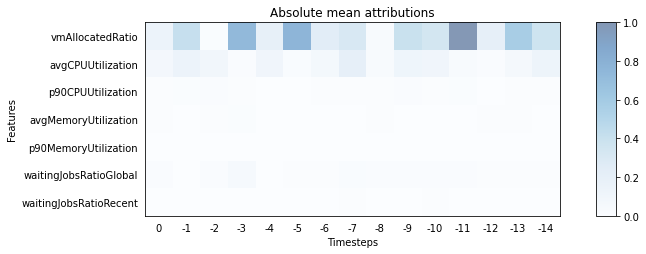

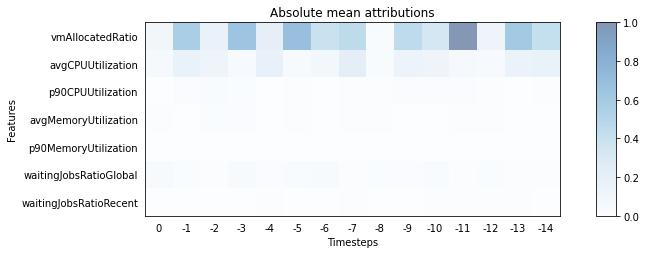

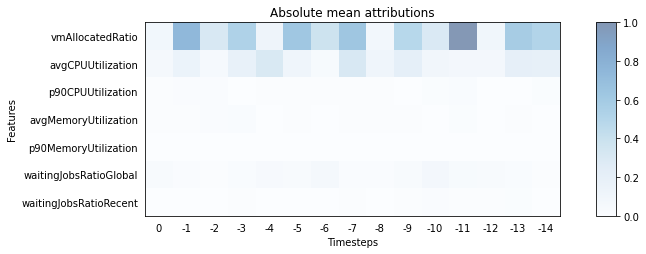

In [34]:
for ig_attributor in ig_attributors:
    mean_attributions_per_action = ig_attributor.get_mean_attributions()
    plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], policy='cnn', abs=True)

# PPO - MLP

In [58]:
from stable_baselines3 import PPO

# model = PPO.load(f'{BASE_PATH}/ppo/CnnPolicy/best_model.zip')
model_policy = '/ppo/MlpPolicy/best_model_'
models = [
    PPO.load(f'{BASE_PATH}{model_policy}0_1.zip'),
    PPO.load(f'{BASE_PATH}{model_policy}1_25000.zip'),
    PPO.load(f'{BASE_PATH}{model_policy}2_50000.zip'),
    PPO.load(f'{BASE_PATH}{model_policy}3_75000.zip'),
    PPO.load(f'{BASE_PATH}{model_policy}4_100000.zip'),
]

X = np.load(f'{BASE_PATH2}/observations/observations_ppo_MlpPolicy_1.npy')
# X = np.load(f'{BASE_PATH2}/ppo/CnnPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

predictions = []
for model in models:
    predictions_model = []
    for _ in X:
        predictions_model.append(model.predict(X[0])[0][0])
    predictions_model = np.array(predictions_model)
    predictions.append(predictions_model)

from ppo_policy import PPOPolicy
nets = [PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model) for model in models]


# Random samples
N = 600
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]

ig_attributors = []
for i, net in enumerate(nets):
    predictions_sample = predictions[i][idxs]

# Sequential samples
# i_start = 0
# i_stop = 500
# X_sample = X[i_start:i_stop]
# predictions_sample = predictions[i_start:i_stop]

    ig_attributor = IGAttributor(net=net,
                                policy='mlp',
                                agent='ppo',
                                data=X_sample,
                                predictions=predictions_sample)

    ig_attributors.append(ig_attributor)

                            

1
1
1
1
1


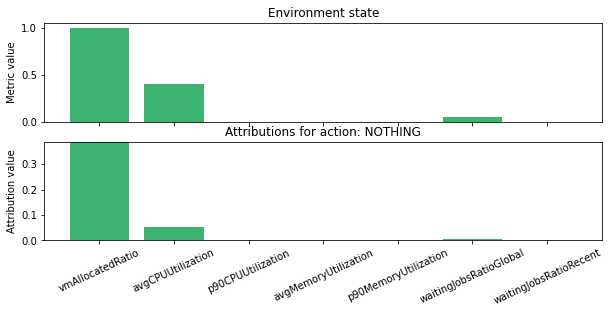

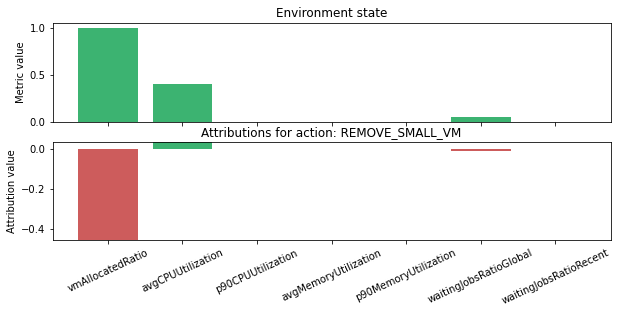

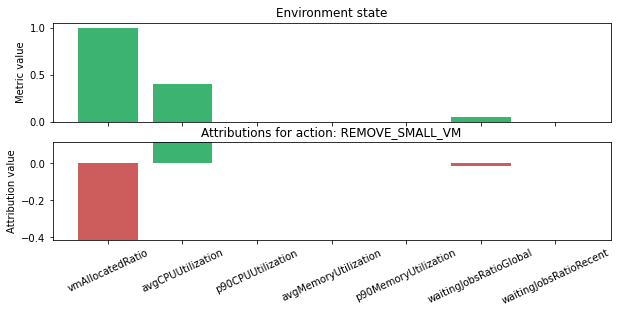

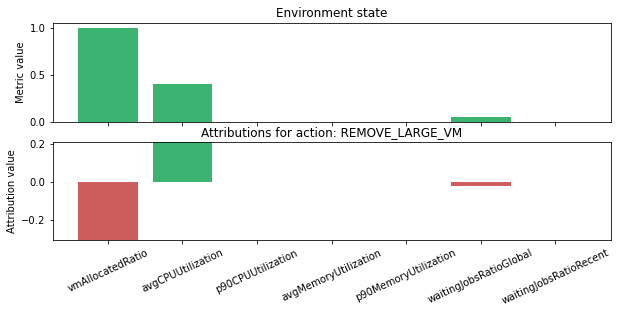

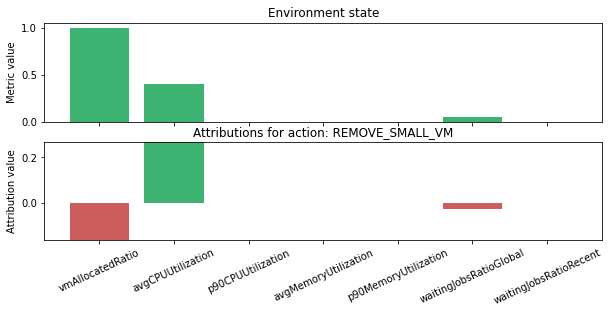

In [61]:


for ig_attributor in ig_attributors:
    ig_attributor.explain_example(1, print_q_values=False)

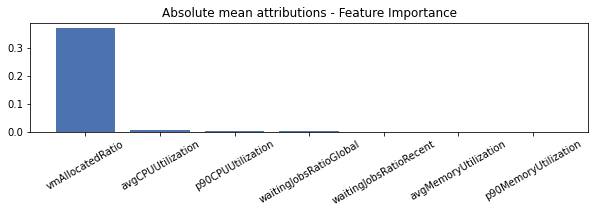

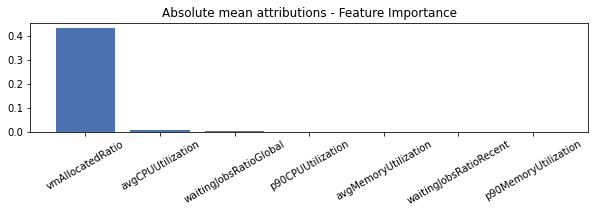

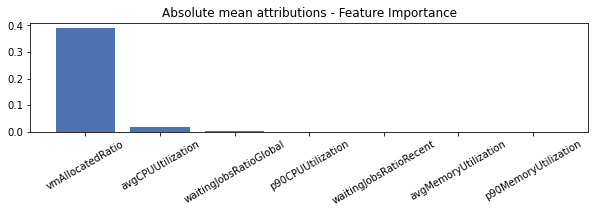

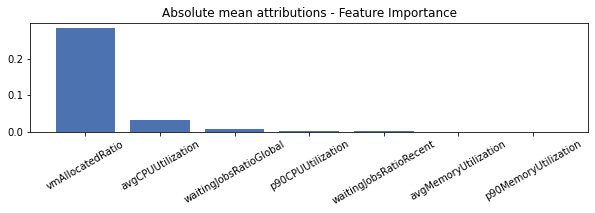

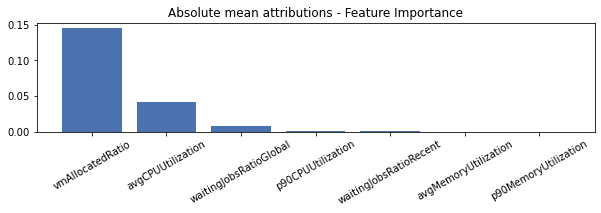

In [63]:
for ig_attributor in ig_attributors:
    mean_attributions_per_action = ig_attributor.get_mean_attributions()
    plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], abs=True)

# DQN - CNN

In [12]:
from stable_baselines3 import DQN

In [36]:
# model = PPO.load(f'{BASE_PATH}/ppo/CnnPolicy/best_model.zip')
model_policy = '/dqn/CnnPolicy/best_model_'
models = [
    DQN.load(f'{BASE_PATH}{model_policy}0_1.zip'),
    DQN.load(f'{BASE_PATH}{model_policy}1_250000.zip'),
    DQN.load(f'{BASE_PATH}{model_policy}2_500000.zip'),
    DQN.load(f'{BASE_PATH}{model_policy}3_750000.zip'),
    DQN.load(f'{BASE_PATH}{model_policy}4_1000000.zip'),
]

X = np.load(f'{BASE_PATH2}/observations/observations_dqn_CnnPolicy_15.npy')
# X = np.load(f'{BASE_PATH2}/ppo/CnnPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([4820, 1, 1, 15, 7])

In [37]:
predictions = []
for model in models:
    predictions_model = []
    for _ in X:
        predictions_model.append(model.predict(X[0])[0][0])
    predictions_model = np.array(predictions_model)
    predictions.append(predictions_model)

In [38]:
nets = [model.q_net for model in models]


In [43]:
# Random samples
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]

ig_attributors = []
for i, net in enumerate(nets):
    predictions_sample = predictions[i][idxs]

# Sequential samples
# i_start = 0
# i_stop = 500
# X_sample = X[i_start:i_stop]
# predictions_sample = predictions[i_start:i_stop]

    ig_attributor = IGAttributor(net=net,
                                policy='cnn',
                                agent='dqn',
                                data=X_sample,
                                predictions=predictions_sample)

    ig_attributors.append(ig_attributor)
                            

torch.Size([500, 1, 15, 7])
torch.Size([500, 1, 15, 7])
torch.Size([500, 1, 15, 7])
torch.Size([500, 1, 15, 7])
torch.Size([500, 1, 15, 7])


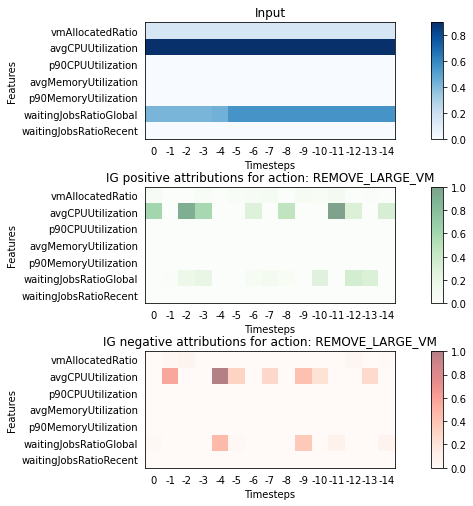

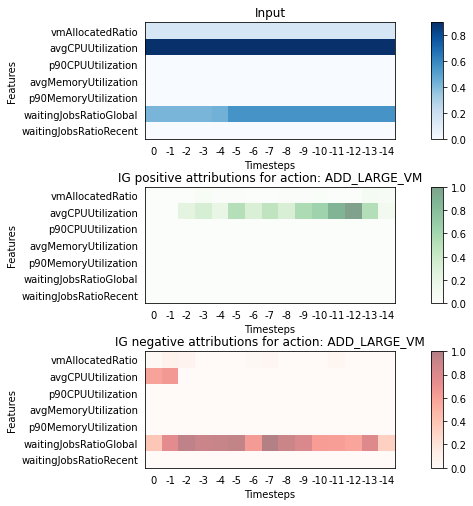

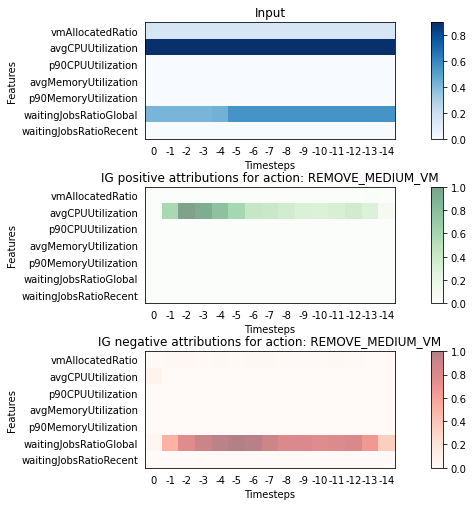

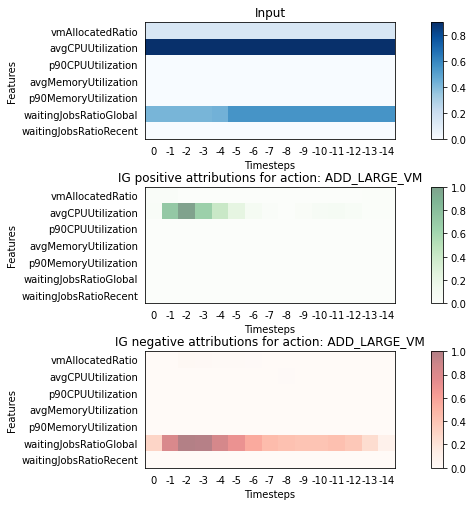

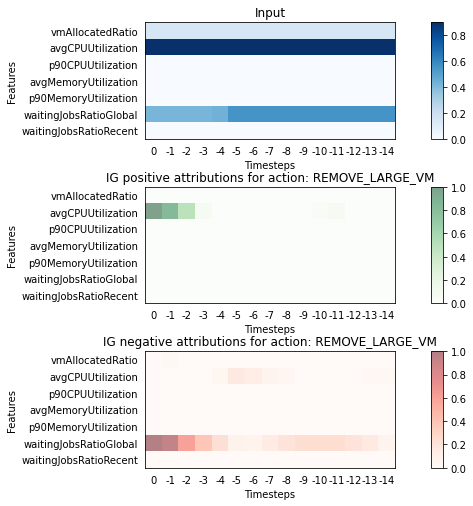

In [40]:
for ig_attributor in ig_attributors:
    ig_attributor.explain_example(1, print_q_values=False)

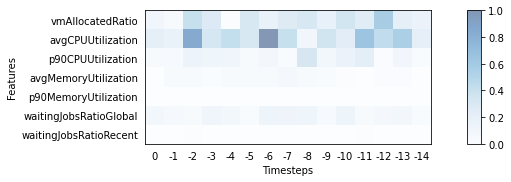

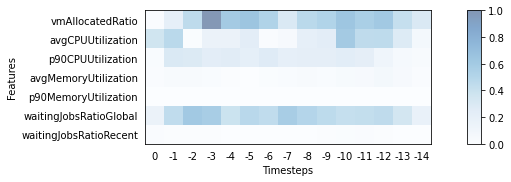

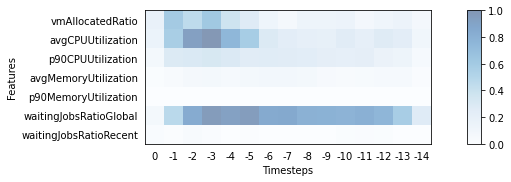

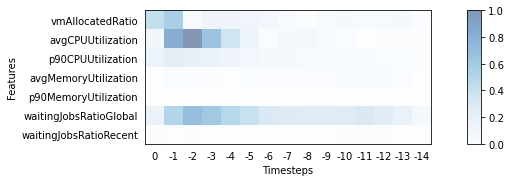

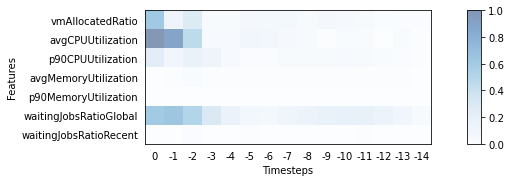

In [50]:
for ig_attributor in ig_attributors:
    mean_attributions_per_action = ig_attributor.get_mean_attributions()
    plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], policy='cnn', abs=True)

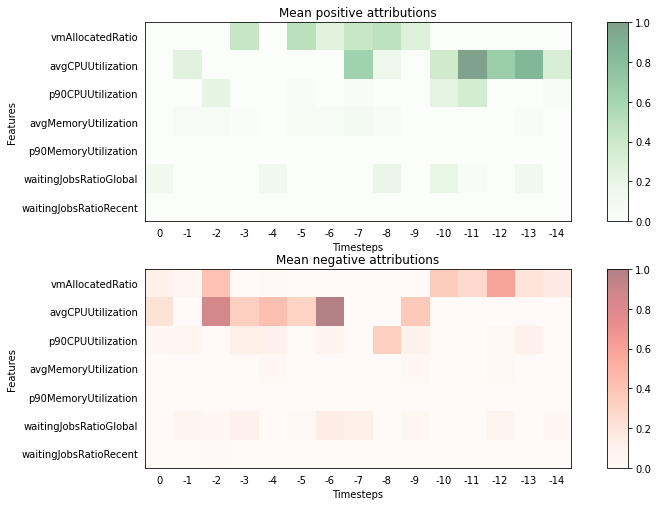

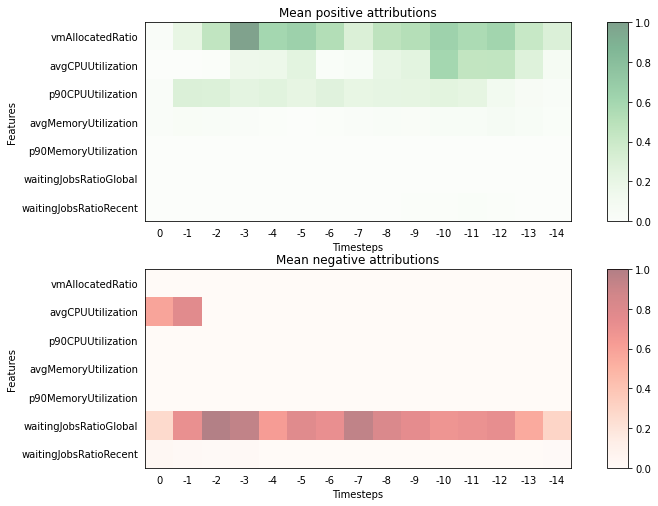

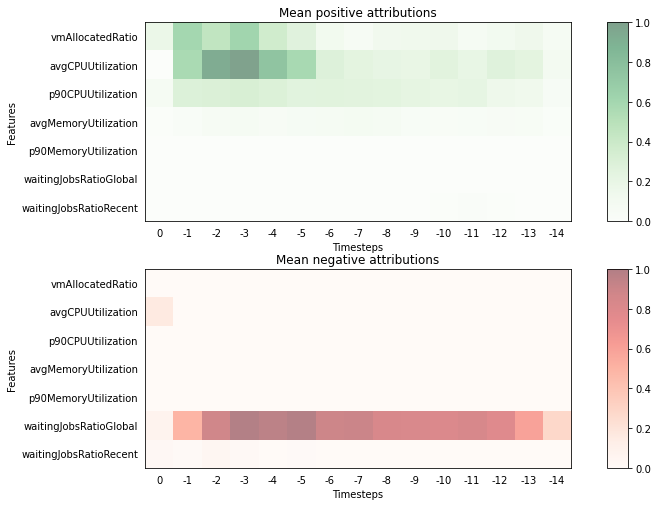

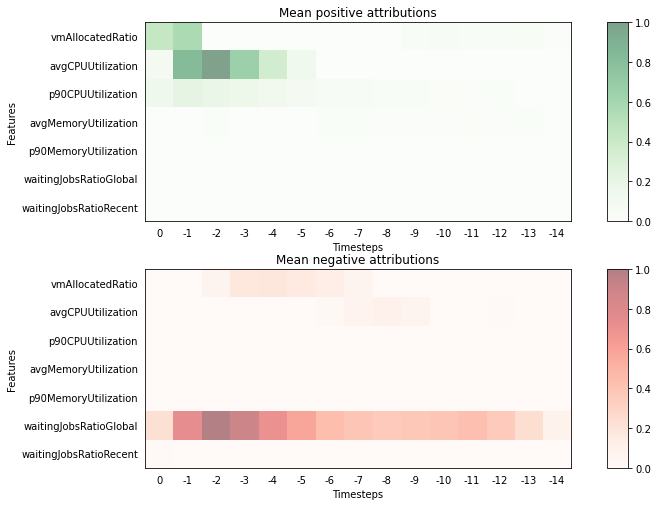

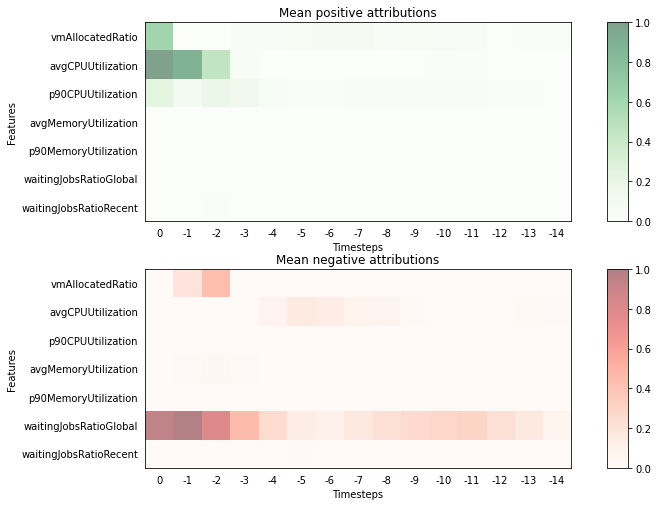

In [45]:
for ig_attributor in ig_attributors:
    mean_attributions_per_action = ig_attributor.get_mean_attributions()
    plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], policy='cnn')

# DQN - MLP

In [ ]:
from stable_baselines3 import DQN

# model = PPO.load(f'{BASE_PATH}/ppo/CnnPolicy/best_model.zip')
model_policy = '/dqn/MlpPolicy/best_model_'
models = [
    DQN.load(f'{BASE_PATH}{model_policy}0_1.zip'),
    DQN.load(f'{BASE_PATH}{model_policy}1_250000.zip'),
    DQN.load(f'{BASE_PATH}{model_policy}2_500000.zip'),
    DQN.load(f'{BASE_PATH}{model_policy}3_750000.zip'),
    DQN.load(f'{BASE_PATH}{model_policy}4_1000000.zip'),
]

X = np.load(f'{BASE_PATH2}/observations/observations_dqn_MlpPolicy_1.npy')
# X = np.load(f'{BASE_PATH2}/ppo/CnnPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

predictions = []
for model in models:
    predictions_model = []
    for _ in X:
        predictions_model.append(model.predict(X[0])[0][0])
    predictions_model = np.array(predictions_model)
    predictions.append(predictions_model)

nets = [model.q_net for model in models]

# Random samples
N = 100
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]

ig_attributors = []
for i, net in enumerate(nets):
    predictions_sample = predictions[i][idxs]

# Sequential samples
# i_start = 0
# i_stop = 500
# X_sample = X[i_start:i_stop]
# predictions_sample = predictions[i_start:i_stop]

    ig_attributor = IGAttributor(net=net,
                                policy='mlp',
                                agent='dqn',
                                data=X_sample,
                                predictions=predictions_sample)

    ig_attributors.append(ig_attributor)


for ig_attributor in ig_attributors:
    ig_attributor.explain_example(1, print_q_values=False)
                            